Gmail : gautamshenoy551@gmail.com

#Common Code

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing 
import math

In [ ]:
def plotGraphs(history, subject):
    plt.plot(history.history[subject])
    plt.plot(history.history[f'val_{subject}'])
    plt.xlabel('Number of Epochs')
    plt.ylabel(subject)
    plt.legend([subject, f'val_{subject}'])
    plt.show()

In [ ]:
def predictionsGraph(labels, predictions):
    plt.plot(labels, predictions)
    plt.xlabel('labels/True Value')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim([0, plt.xlim()[1]])
    plt.ylim([0, plt.ylim()[1]])
    plt.show()

In [ ]:
def errorGraph(preds, labels, counts):
    errors = labels - preds
    plt.hist(errors, counts)
    plt.xlabel('Error')
    plt.ylabel('Counts')
    plt.show()

#Bank Loan Aprroval

[Click Me for dataset](https://www.kaggle.com/ranja7/bankloan-tobeapproved)


In [ ]:
cd '/content/drive/MyDrive/Colab Notebooks/Ml _ GirlScript/MultiVariate_Linear_Regression/bank_loan'

/content/drive/MyDrive/Colab Notebooks/Ml _ GirlScript/MultiVariate_Linear_Regression/bank_loan


In [ ]:
ls

banking_loanapproval.xlsx


In [ ]:
bank_data = pd.read_excel('banking_loanapproval.xlsx')
bank_data.head()

,CustomerID,Income,#CreditCards,LoanAmountinK,#LoanAccounts
0,5409,37073,1,90,1
1,5477,50721,1,260,2
2,5507,43578,2,0,0
3,8,69553,1,0,0
4,158,37502,1,0,0


In [ ]:
norm_bank_data = bank_data.copy()

for column in norm_bank_data.columns:
    norm_bank_data[column] = (norm_bank_data[column] - norm_bank_data[column].min()) / (norm_bank_data[column].max() - norm_bank_data[column].min())

print(bank_data.head())
print(norm_bank_data.head())

   CustomerID  Income  #CreditCards  LoanAmountinK  #LoanAccounts
0        5409   37073             1             90              1
1        5477   50721             1            260              2
2        5507   43578             2              0              0
3           8   69553             1              0              0
4         158   37502             1              0              0
   CustomerID    Income  #CreditCards  LoanAmountinK  #LoanAccounts
0    0.092260  0.309742           0.0       0.053571       0.142857
1    0.093422  0.524820           0.0       0.154762       0.285714
2    0.093934  0.412254           1.0       0.000000       0.000000
3    0.000000  0.821593           0.0       0.000000       0.000000
4    0.002562  0.316503           0.0       0.000000       0.000000


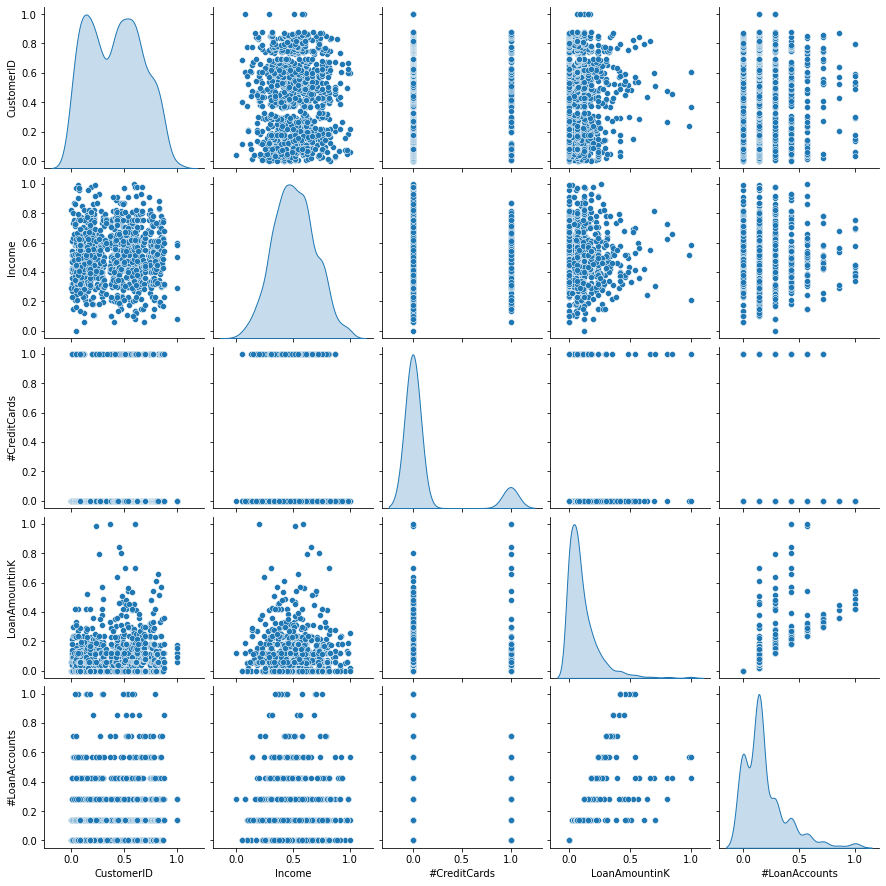

In [ ]:
sns.pairplot(
    norm_bank_data,
    x_vars = norm_bank_data.columns,
    y_vars = norm_bank_data.columns,
    diag_kind = 'kde',
)

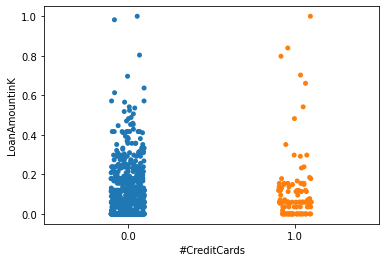

In [ ]:
sns.stripplot(x='#CreditCards', y = 'LoanAmountinK', data = norm_bank_data)

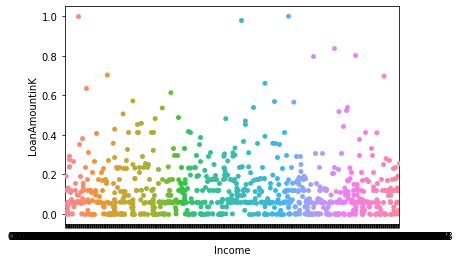

In [ ]:
sns.stripplot(x='Income', y = 'LoanAmountinK', data = norm_bank_data)

In [ ]:
trainData = norm_bank_data.sample(frac = 0.8, random_state = 0)
testData = norm_bank_data.drop(trainData.index)

trainFeatures = trainData.copy()
trainFeatures.pop('CustomerID')
testFeatures = testData.copy()
testFeatures.pop('CustomerID')

trainLabels = trainFeatures.pop('LoanAmountinK')
testLabels = testFeatures.pop('LoanAmountinK')

In [ ]:
print(f'Train Data : \n{trainData.head()}')
print(f'Test Data : \n{testData.head()}')
print("====================================================")
print(f'Train Data Featues : \n{trainFeatures.head()}')
print(f'Test Data Features : \n{testFeatures.head()}')
print("====================================================")
print(f'Train Data Labels : \n{trainLabels.head()}')
print(f'Test Data Labels : \n{testLabels.head()}')

Train Data : 
     CustomerID    Income  #CreditCards  LoanAmountinK  #LoanAccounts
993    0.621684  0.376749           0.0       0.000000       0.000000
859    0.572163  0.731893           0.0       0.095238       0.142857
298    0.458670  0.630311           0.0       0.000000       0.000000
553    0.514084  0.536183           1.0       0.130952       0.142857
672    0.432654  0.908850           0.0       0.232143       0.428571
Test Data : 
    CustomerID    Income  #CreditCards  LoanAmountinK  #LoanAccounts
9     0.097778  0.851488           0.0       0.095238       0.142857
11    0.099486  0.657385           0.0       0.095238       0.142857
19    0.108608  0.615229           0.0       0.000000       0.000000
23    0.016245  0.737582           0.0       0.297619       0.714286
28    0.122615  0.824950           0.0       0.119048       0.285714
Train Data Featues : 
       Income  #CreditCards  #LoanAccounts
993  0.376749           0.0       0.000000
859  0.731893           0.0    

In [ ]:
numOfFeatures = len(trainFeatures.columns)

inputNeurons = math.ceil((2*numOfFeatures)/3)
print(inputNeurons)

2


In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=inputNeurons, activation='relu'),
                             tf.keras.layers.Dense(units=2*inputNeurons, activation='relu'),
                             tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(
              loss = 'mean_absolute_error',
              optimizer = tf.keras.optimizers.Adam(0.01),
              metrics = ['mse', 'mae'])

In [ ]:
numOfEpochs = 400

bank_history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numOfEpochs)

Epoch 1/400
25/25 [==============================] - 1s 9ms/step - loss: 0.1630 - mse: 0.0565 - mae: 0.1630 - val_loss: 0.0975 - val_mse: 0.0206 - val_mae: 0.0975
Epoch 2/400
25/25 [==============================] - 0s 2ms/step - loss: 0.0837 - mse: 0.0175 - mae: 0.0837 - val_loss: 0.0856 - val_mse: 0.0230 - val_mae: 0.0856
Epoch 3/400
25/25 [==============================] - 0s 2ms/step - loss: 0.0800 - mse: 0.0175 - mae: 0.0800 - val_loss: 0.0858 - val_mse: 0.0231 - val_mae: 0.0858
Epoch 4/400
25/25 [==============================] - 0s 2ms/step - loss: 0.0798 - mse: 0.0177 - mae: 0.0798 - val_loss: 0.0852 - val_mse: 0.0223 - val_mae: 0.0852
Epoch 5/400
25/25 [==============================] - 0s 2ms/step - loss: 0.0793 - mse: 0.0179 - mae: 0.0793 - val_loss: 0.0851 - val_mse: 0.0223 - val_mae: 0.0851
Epoch 6/400
25/25 [==============================] - 0s 2ms/step - loss: 0.0796 - mse: 0.0176 - mae: 0.0796 - val_loss: 0.0856 - val_mse: 0.0220 - val_mae: 0.0856
Epoch 7/400
25/25 [===

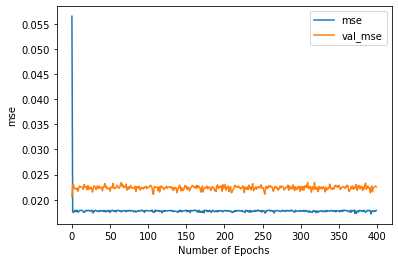

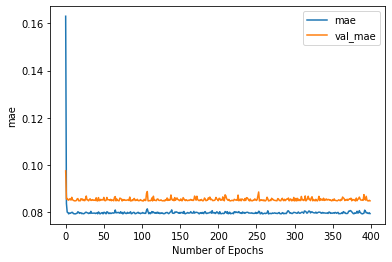

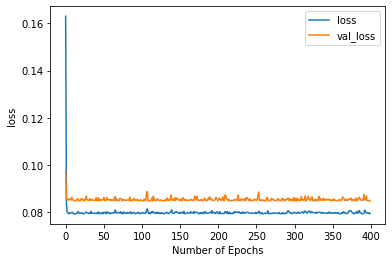

In [ ]:
plotGraphs(bank_history, 'mse')
plotGraphs(bank_history, 'mae')
plotGraphs(bank_history, 'loss')

In [ ]:
print(f'''

TestFeatures : {testFeatures.head()}

Predicted : {model.predict(testFeatures.head())}

Predicted (Flattened) : {model.predict(testFeatures.head()).flatten()}

''')



TestFeatures :       Income  #CreditCards  #LoanAccounts
9   0.851488           0.0       0.142857
11  0.657385           0.0       0.142857
19  0.615229           0.0       0.000000
23  0.737582           0.0       0.714286
28  0.824950           0.0       0.285714

Predicted : [[0.05994282]
 [0.05994282]
 [0.05994282]
 [0.05994282]
 [0.05994282]]

Predicted (Flattened) : [0.05994282 0.05994282 0.05994282 0.05994282 0.05994282]




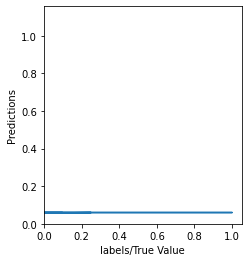

In [ ]:
predictionsGraph(testLabels, model.predict(testFeatures))

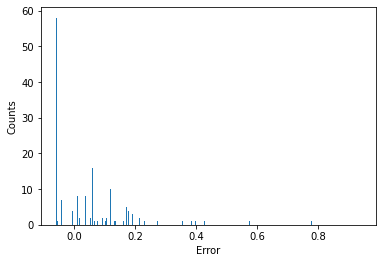

In [ ]:
errorGraph(model.predict(testFeatures).flatten(), testLabels, numOfEpochs)

#Car Sell Price (Car Dekho Dataset)

[Click me for dataset](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho)

In [ ]:
cd '/content/drive/MyDrive/Colab Notebooks/Ml _ GirlScript/MultiVariate_Linear_Regression/car_sell_price'

/content/drive/MyDrive/Colab Notebooks/Ml _ GirlScript/MultiVariate_Linear_Regression/car_sell_price


In [ ]:
ls

'car data.csv'                    'Car details v3.csv'
'CAR DETAILS FROM CAR DEKHO.csv'  'Car details v3.gsheet'


In [ ]:
car_data = pd.read_csv('Car details v3.csv', sep = ',', na_values=' ')
print("has Null Values ? : \n", car_data.isnull().sum())
print("shape : ", car_data.shape)
car_data.head()

has Null Values ? : 
 name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64
shape :  (8128, 13)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
car_data = car_data.dropna()
print(dict(car_data.isnull().sum()))
print("new shape : ",car_data.shape)

{'name': 0, 'year': 0, 'selling_price': 0, 'km_driven': 0, 'fuel': 0, 'seller_type': 0, 'transmission': 0, 'owner': 0, 'mileage': 0, 'engine': 0, 'max_power': 0, 'torque': 0, 'seats': 0}
new shape :  (7906, 13)


In [ ]:
car_names = car_data['name']
brand = []
car = []

for name in car_names:
    brand.append(name.split()[0])
    car.append(name.split()[1])

print(brand)
print(car) 

['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Maruti', 'Hyundai', 'Maruti', 'Maruti', 'Toyota', 'Ford', 'Renault', 'Maruti', 'Maruti', 'Maruti', 'Mahindra', 'Maruti', 'Hyundai', 'Maruti', 'Hyundai', 'Mahindra', 'Honda', 'Maruti', 'Maruti', 'Tata', 'Maruti', 'Maruti', 'Chevrolet', 'Maruti', 'Maruti', 'Maruti', 'Maruti', 'Hyundai', 'Maruti', 'Maruti', 'Maruti', 'Hyundai', 'Datsun', 'Tata', 'Maruti', 'Jeep', 'Honda', 'Honda', 'Maruti', 'Maruti', 'Maruti', 'Toyota', 'Toyota', 'Mercedes-Benz', 'Honda', 'Mitsubishi', 'Honda', 'Maruti', 'Honda', 'Toyota', 'Toyota', 'Audi', 'Toyota', 'Audi', 'Mercedes-Benz', 'Tata', 'Hyundai', 'Hyundai', 'Maruti', 'Ford', 'Maruti', 'Volkswagen', 'Honda', 'Maruti', 'Volkswagen', 'Maruti', 'Maruti', 'Hyundai', 'Maruti', 'Toyota', 'Maruti', 'Maruti', 'Volkswagen', 'Toyota', 'Ford', 'BMW', 'Maruti', 'Datsun', 'Maruti', 'Maruti', 'Hyundai', 'Maruti', 'Maruti', 'Volkswagen', 'Hyundai', 'Volkswagen', 'Maruti', 'Hyundai', 'Maruti', 'Hyundai', 'Maruti', 'Hyundai', 'Maruti',

In [ ]:
car_data['brand'] = brand
car_data['car_name'] = car

car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,car_name
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,Swift
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,Rapid
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,City
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai,i20
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,Swift


In [ ]:
print("{:<12}: {}".format('Brand', car_data['brand'].unique()))
print("{:<12}: {}".format('Car Name', car_data['car_name'].unique()))

Brand       : ['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi' 'Audi'
 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo' 'Daewoo'
 'Kia' 'Fiat' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel']
Car Name    : ['Swift' 'Rapid' 'City' 'i20' 'Xcent' 'Wagon' '800' 'Etios' 'Figo'
 'Duster' 'Zen' 'KUV' 'Ertiga' 'Alto' 'Verito' 'WR-V' 'SX4' 'Tigor'
 'Baleno' 'Enjoy' 'Omni' 'Vitara' 'Verna' 'GO' 'Safari' 'Compass'
 'Fortuner' 'Innova' 'B' 'Amaze' 'Pajero' 'Ciaz' 'Jazz' 'A6' 'Corolla'
 'New' 'Manza' 'i10' 'Ameo' 'Vento' 'EcoSport' 'X1' 'Celerio' 'Polo'
 'Eeco' 'Scorpio' 'Freestyle' 'Passat' 'Indica' 'XUV500' 'Indigo'
 'Terrano' 'Creta' 'KWID' 'Santro' 'Q5' 'ES' 'XF' 'Wrangler' 'Rover'
 'S-Class' '5' 'X4' 'Superb' 'E-Class' 'Hector' 'XC40' 'Q7' 'Elantra' 'XE'
 'Nexon' 'CLA' 'Glanza' '3' 'Camry' 'XC90' 'Ritz' 'Grand' 'Matiz' 'Zest'
 'Getz' 'Elite' 'Brio' 'Hexa' 'Sunny' 'Micra' 'Ssangyong' 'Quanto'
 '

In [ ]:
car_data['brand'] = car_data['brand'].apply({'Maruti' : 1, 'Skoda' : 2, 'Honda' : 3, 'Hyundai' : 4, 'Toyota' : 5, 'Ford' : 6, 'Renault' : 7,
             'Mahindra' : 8, 'Tata' : 9, 'Chevrolet' : 10, 'Datsun' : 11, 'Jeep' : 12,  'Mercedes-Benz' : 13,
             'Mitsubishi' : 14,  'Audi' : 15, 'Volkswagen' : 16,  'BMW' : 17, 'Nissan' : 18, 'Lexus' : 19, 
             'Jaguar' : 20, 'Land' : 21, 'MG' : 22, 'Volvo' : 23, 'Daewoo' : 24, 'Kia' : 25, 'Fiat' : 26,
             'Force' : 27, 'Ambassador' : 28,  'Ashok' : 29,  'Isuzu' : 30, 'Opel' : 31}.get)

car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,car_name
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1,Swift
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2,Rapid
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,3,City
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,4,i20
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,1,Swift


In [ ]:
print("{:<12}: {}".format('Brand', car_data['brand'].unique()))

Brand       : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


In [ ]:
print("{:<12}: {}".format('Fuel', car_data['fuel'].unique()))
print("{:<12}: {}".format('seller_type', car_data['seller_type'].unique()))
print("{:<12}: {}".format('transmission', car_data['transmission'].unique()))
print("{:<12}: {}".format('owner', car_data['owner'].unique()))

Fuel        : ['Diesel' 'Petrol' 'LPG' 'CNG']
seller_type : ['Individual' 'Dealer' 'Trustmark Dealer']
transmission: ['Manual' 'Automatic']
owner       : ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


In [ ]:
car_data['fuel'] = car_data['fuel'].apply({'Diesel' : 1, 'Petrol' : 2, 'LPG' : 3, 'CNG' : 4}.get)
car_data['seller_type'] = car_data['seller_type'].apply({'Individual' : 1, 'Dealer' : 2, 'Trustmark Dealer' : 3}.get)
car_data['transmission'] = car_data['transmission'].apply({'Manual' : 0, 'Automatic' : 1}.get)
car_data['owner'] = car_data['owner'].apply({'First Owner' : 1, 'Second Owner' : 2, 'Third Owner' : 3, 'Fourth & Above Owner' : 4, 'Test Drive Car' : 5}.get)

car_data.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,car_name
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,0,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1,Swift
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,0,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2,Rapid
2,Honda City 2017-2020 EXi,2006,158000,140000,2,1,0,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,3,City
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,0,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,4,i20
4,Maruti Swift VXI BSIII,2007,130000,120000,2,1,0,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,1,Swift
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,2,1,0,1,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0,4,Xcent
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,3,1,0,1,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0,1,Wagon
7,Maruti 800 DX BSII,2001,45000,5000,2,1,0,2,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0,1,800
8,Toyota Etios VXD,2011,350000,90000,1,1,0,1,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0,5,Etios
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,1,1,0,1,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0,6,Figo


In [ ]:
car_mileage = car_data['mileage']
mileage = []

for name in car_mileage:
    mileage.append(name.split()[0])

print(mileage)

['23.4', '21.14', '17.7', '23.0', '16.1', '20.14', '17.3', '16.1', '23.59', '20.0', '19.01', '17.3', '19.3', '18.9', '18.15', '24.52', '23.0', '19.7', '22.54', '21.0', '25.5', '26.59', '21.5', '20.3', '21.4', '24.7', '18.2', '18.9', '16.8', '24.3', '14.0', '18.6', '24.3', '33.44', '23.95', '17.0', '20.63', '13.93', '16.1', '16.0', '17.8', '16.8', '18.5', '24.3', '23.95', '12.55', '12.99', '14.8', '24.7', '13.5', '26.0', '20.65', '27.3', '11.36', '12.99', '17.68', '14.28', '18.53', '14.84', '21.12', '20.36', '21.27', '26.59', '18.16', '21.4', '22.0', '25.1', '20.51', '21.66', '24.3', '24.3', '20.36', '25.2', '12.55', '22.9', '16.02', '20.54', '12.99', '22.77', '15.71', '23.1', '19.02', '24.7', '24.7', '19.81', '14.0', '26.2', '16.47', '19.81', '15.04', '18.2', '18.5', '26.59', '19.1', '19.7', '22.54', '21.79', '18.8', '21.21', '15.37', '21.4', '11.79', '19.0', '17.0', '14.3', '15.8', '15.1', '19.09', '22.32', '21.9', '14.53', '21.63', '24.3', '20.85', '20.51', '20.45', '19.67', '23.0', 

In [ ]:
car_data['new_mileage'] = mileage

car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,car_name,new_mileage
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,0,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1,Swift,23.4
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,0,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2,Rapid,21.14
2,Honda City 2017-2020 EXi,2006,158000,140000,2,1,0,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,3,City,17.7
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,0,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,4,i20,23.0
4,Maruti Swift VXI BSIII,2007,130000,120000,2,1,0,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,1,Swift,16.1


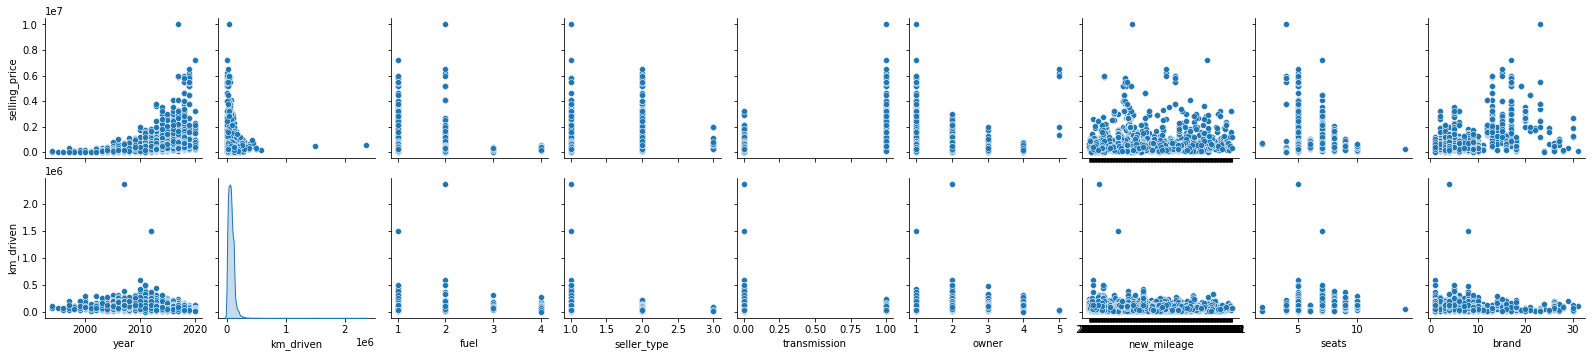

In [ ]:
sns.pairplot(
    car_data,
    x_vars = ['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'new_mileage', 'seats', 'brand'],
    y_vars = ['selling_price', 'km_driven'], 
    diag_kind = 'kde')

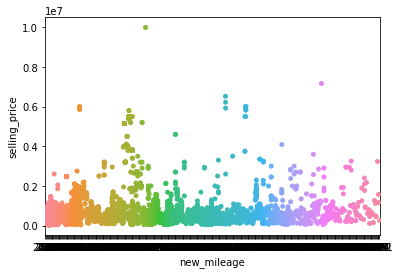

In [ ]:
sns.stripplot(x = 'new_mileage', y = 'selling_price', data = car_data)

In [ ]:
trainData = car_data.sample(frac = 0.8, random_state=0)
testData = car_data.drop(trainData.index)

trainFeatures = trainData.copy()
testFeatures = testData.copy()
trainFeatures.pop('name')
trainFeatures.pop('mileage')
trainFeatures.pop('engine')
trainFeatures.pop('max_power')
trainFeatures.pop('torque')
trainFeatures.pop('car_name')

testFeatures.pop('name')
testFeatures.pop('mileage')
testFeatures.pop('engine')
testFeatures.pop('max_power')
testFeatures.pop('torque')
testFeatures.pop('car_name')

# trainLabels = trainFeatures.pop('selling_price')
# testLabels = testFeatures.pop('selling_price')

0         Swift
7           800
22        Swift
25       Baleno
26         Alto
         ...   
8101     Grande
8110    Celerio
8113     Innova
8114       Alto
8125      Swift
Name: car_name, Length: 1581, dtype: object

In [ ]:
trainFeatures.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,brand,new_mileage
4048,2017,430000,38000,2,1,0,2,5.0,9,23.84
4831,2019,779000,7032,2,3,1,1,5.0,3,19.0
5123,2010,200000,110000,1,1,0,2,5.0,6,20.0
6505,2015,800000,70000,1,1,0,1,7.0,8,15.4
46,2018,390000,10300,2,2,0,1,5.0,1,23.95


In [ ]:
from sklearn import preprocessing

x = trainFeatures.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
trainFeatures = pd.DataFrame(x_scaled)
print(trainFeatures.head())

y = testFeatures.values
y_scaled = min_max_scaler.fit_transform(y)
testFeatures = pd.DataFrame(y_scaled)
print(trainFeatures.head())

          0         1         2         3  ...     6         7         8         9
0  0.884615  0.055788  0.016098  0.333333  ...  0.25  0.250000  0.266667  0.712919
1  0.961538  0.104463  0.002979  0.333333  ...  0.00  0.250000  0.066667  0.568182
2  0.615385  0.023710  0.046601  0.000000  ...  0.25  0.250000  0.166667  0.598086
3  0.807692  0.107392  0.029655  0.000000  ...  0.00  0.416667  0.233333  0.460526
4  0.923077  0.050209  0.004363  0.333333  ...  0.00  0.250000  0.000000  0.716208

[5 rows x 10 columns]
          0         1         2         3  ...     6         7         8         9
0  0.884615  0.055788  0.016098  0.333333  ...  0.25  0.250000  0.266667  0.712919
1  0.961538  0.104463  0.002979  0.333333  ...  0.00  0.250000  0.066667  0.568182
2  0.615385  0.023710  0.046601  0.000000  ...  0.25  0.250000  0.166667  0.598086
3  0.807692  0.107392  0.029655  0.000000  ...  0.00  0.416667  0.233333  0.460526
4  0.923077  0.050209  0.004363  0.333333  ...  0.00  0.250000  

In [ ]:
trainLabels = trainFeatures.pop(1)
testLabels = testFeatures.pop(1)

print(trainLabels.head())
print(testLabels.head())

0    0.055788
1    0.104463
2    0.023710
3    0.107392
4    0.050209
Name: 1, dtype: float64
0    0.041982
1    0.001354
2    0.049506
3    0.054521
4    0.024427
Name: 1, dtype: float64


In [ ]:
print(f'Train Data : \n{trainData.head()}')
print(f'Test Data : \n{testData.head()}')
print("====================================================")
print(f'Train Data Featues : \n{trainFeatures.head()}')
print(f'Test Data Features : \n{testFeatures.head()}')
print("====================================================")
print(f'Train Data Labels : \n{trainLabels.head()}')
print(f'Test Data Labels : \n{testLabels.head()}')

Train Data : 
                               name  year  ...  car_name  new_mileage
4048     Tata Tiago 1.2 Revotron XT  2017  ...     Tiago        23.84
4831  Honda Amaze V CVT Petrol BSIV  2019  ...     Amaze         19.0
5123           Ford Figo Diesel ZXI  2010  ...      Figo         20.0
6505  Mahindra Scorpio 1.99 S6 Plus  2015  ...   Scorpio         15.4
46              Maruti Alto K10 VXI  2018  ...      Alto        23.95

[5 rows x 16 columns]
Test Data : 
                       name  year  selling_price  ...  brand  car_name  new_mileage
0    Maruti Swift Dzire VDI  2014         450000  ...      1     Swift         23.4
7        Maruti 800 DX BSII  2001          45000  ...      1       800         16.1
22   Maruti Swift Dzire ZDI  2015         525000  ...      1     Swift        26.59
25  Maruti Baleno Delta 1.2  2016         575000  ...      1    Baleno         21.4
26      Maruti Alto 800 LXI  2017         275000  ...      1      Alto         24.7

[5 rows x 16 columns]
Tra

In [ ]:
numFeatures = len(trainFeatures.columns)
inputNeurons = math.ceil((2 * numFeatures) / 3)
print(inputNeurons)

6


In [ ]:
car_model = tf.keras.Sequential([
                                 tf.keras.layers.Dense(units = inputNeurons, activation='relu'),
                                 tf.keras.layers.Dense(units=2*inputNeurons, activation='relu'),
                                 tf.keras.layers.Dense(1)
])

In [ ]:
car_model.compile(loss='mean_absolute_error', optimizer = tf.keras.optimizers.Adam(0.01), metrics = ['mse', 'mae'])

In [ ]:
numOfEpochs = 100

car_history = car_model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numOfEpochs)

Epoch 1/100
198/198 [==============================] - 1s 3ms/step - loss: 0.0389 - mse: 0.0060 - mae: 0.0389 - val_loss: 0.0340 - val_mse: 0.0029 - val_mae: 0.0340
Epoch 2/100
198/198 [==============================] - 0s 2ms/step - loss: 0.0324 - mse: 0.0040 - mae: 0.0324 - val_loss: 0.0297 - val_mse: 0.0027 - val_mae: 0.0297
Epoch 3/100
198/198 [==============================] - 0s 2ms/step - loss: 0.0303 - mse: 0.0037 - mae: 0.0303 - val_loss: 0.0368 - val_mse: 0.0028 - val_mae: 0.0368
Epoch 4/100
198/198 [==============================] - 0s 2ms/step - loss: 0.0291 - mse: 0.0035 - mae: 0.0291 - val_loss: 0.0301 - val_mse: 0.0026 - val_mae: 0.0301
Epoch 5/100
198/198 [==============================] - 0s 2ms/step - loss: 0.0283 - mse: 0.0034 - mae: 0.0283 - val_loss: 0.0375 - val_mse: 0.0038 - val_mae: 0.0375
Epoch 6/100
198/198 [==============================] - 0s 2ms/step - loss: 0.0282 - mse: 0.0034 - mae: 0.0282 - val_loss: 0.0309 - val_mse: 0.0029 - val_mae: 0.0309
Epoch 7/10

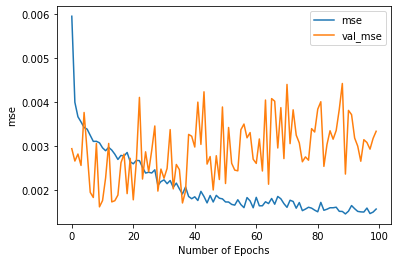

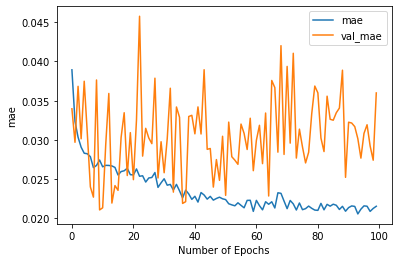

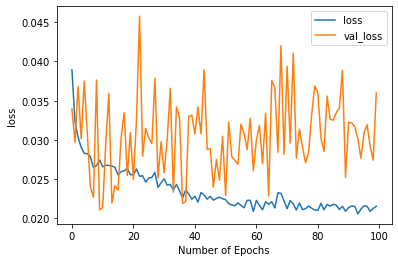

In [ ]:
plotGraphs(car_history, 'mse')
plotGraphs(car_history, 'mae')
plotGraphs(car_history, 'loss')

In [ ]:
print(f'''

TestFeatures : {testFeatures.head()}

Predicted : {car_model.predict(testFeatures.head())}

Predicted (Flattened) : {car_model.predict(testFeatures.head()).flatten()}

Actual Labels : {testLabels.head()}

''')



TestFeatures :           0         2         3    4    5         6         7    8         9
0  0.739130  0.250294  0.000000  0.0  0.0  0.000000  0.166667  0.0  0.557143
1  0.173913  0.006417  0.333333  0.0  0.0  0.333333  0.000000  0.0  0.383333
2  0.782609  0.067169  0.000000  0.0  0.0  0.000000  0.166667  0.0  0.633095
3  0.826087  0.075848  0.333333  0.0  0.0  0.000000  0.166667  0.0  0.509524
4  0.869565  0.046340  0.333333  0.0  0.0  0.000000  0.166667  0.0  0.588095

Predicted : [[0.06174552]
 [0.02069749]
 [0.08078822]
 [0.06814159]
 [0.0691437 ]]

Predicted (Flattened) : [0.06174552 0.02069749 0.08078822 0.06814159 0.0691437 ]

Actual Labels : 0    0.041982
1    0.001354
2    0.049506
3    0.054521
4    0.024427
Name: 1, dtype: float64




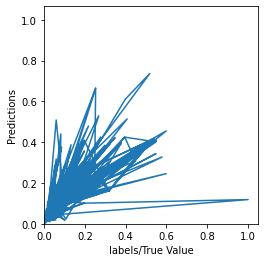

In [ ]:
predictionsGraph(testLabels, car_model.predict(testFeatures))

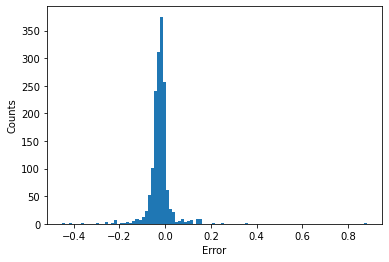

In [ ]:
errorGraph(car_model.predict(testFeatures).flatten(), testLabels, numOfEpochs)

In [ ]:
#as we had used min max scaler on testFeatures with 10 columns ... inverse will also require 10 colums
#that is why im copying actual testFeatures and adding predictions at loc 1 as i had popped selling_price
#and assigned it to testLabels
new_testFeatueres = testFeatures.copy()
new_testFeatueres.insert(1, '1', car_model.predict(testFeatures)) # since selling price was located at loc 1 in actual testFeatures dataframe above 
#before popping thats why we are adding the predicted selling price at loc 1
x_deScaled = min_max_scaler.inverse_transform(new_testFeatueres)
new_testFeatueres = pd.DataFrame(x_deScaled)
print(new_testFeatueres.head())

        0              1         2    3    4    5    6    7    8      9
0  2014.0  647013.938792  145500.0  1.0  1.0  0.0  1.0  5.0  1.0  23.40
1  2001.0  237826.858671    5000.0  2.0  1.0  0.0  2.0  4.0  1.0  16.10
2  2015.0  836841.097117   40000.0  1.0  1.0  0.0  1.0  5.0  1.0  26.59
3  2016.0  710773.212497   45000.0  2.0  1.0  0.0  1.0  5.0  1.0  21.40
4  2017.0  720762.673145   28000.0  2.0  1.0  0.0  1.0  5.0  1.0  24.70


Denormalising Method 2

In [ ]:
maxSell = car_data.max()['selling_price']
print(maxSell)

minSell = car_data.min()['selling_price']
print(minSell)

10000000
29999


In [ ]:
testFeatures.head()

,0,2,3,4,5,6,7,8,9
0,0.739130,0.250294,0.000000,0.0,0.0,0.000000,0.166667,0.0,0.557143
1,0.173913,0.006417,0.333333,0.0,0.0,0.333333,0.000000,0.0,0.383333
2,0.782609,0.067169,0.000000,0.0,0.0,0.000000,0.166667,0.0,0.633095
3,0.826087,0.075848,0.333333,0.0,0.0,0.000000,0.166667,0.0,0.509524
4,0.869565,0.046340,0.333333,0.0,0.0,0.000000,0.166667,0.0,0.588095


In [ ]:
value = car_model.predict([[0.739130, 0.250294, 0.000000, 0.0, 0.0, 0.000000, 0.166667, 0.0, 0.557143]])

value = value * (maxSell - minSell) + minSell
print(value)

[[645600.49157289]]


In [ ]:
testLabels.head()

0    0.041982
1    0.001354
2    0.049506
3    0.054521
4    0.024427
Name: 1, dtype: float64